In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score


import graphviz
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image 

/home/eliran/.local/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


ModuleNotFoundError: No module named 'pydot'

In [3]:
# question 1.A
# Project task and description:
# predict the white wine quality based on physicochemical tests.
# the project can be used by commecial companies for example.
# classification or regression tasks.

# Read the data
data = pd.read_csv('winequality-white.csv', delimiter=';')
# Test dataset metadata
data.info()

# question 1.B
# There are 4898 enteries.
# None of them is missing (Null)

# input variables (based on physicochemical tests): 
# 1 - fixed acidity ( float64 )
# 2 - volatile acidity ( float64 )
# 3 - citric acid ( float64 )
# 4 - residual sugar ( float64 )
# 5 - chlorides ( float64 )
# 6 - free sulfur dioxide ( float64 )
# 7 - total sulfur dioxide ( float64 )
# 8 - density ( float64 )
# 9 - pH ( float64 )
# 10 - sulphates ( float64 ) 
# 11 - alcohol ( float64 )

# output variable:
# quality (score between 3 and 9) : ( int64 )
# 3 - the poorest quality
# 9 - the best quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
# data desctiption: ( min, max, statistics, ect')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# Print first rows to view the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


question 1.C

The KDD stages for the given problem:
1. Collect the data.
2. Data cleaning ( check for missing values, illegal values, anomalies detection )
3. Transformations on the data
4. Choose Data Mining algorithms( eg. regresions, decition trees ...)
5. Discretization and classification ( if needed )
6. Run different data mining techniques.
7. Analizing the results
8. Conclusions

question 1.D
Data mining alternatives:
1. ID3 decision tree with Information Gain. A top to buttom tree that
   is built on each node aruond the highest information gain.
   It tends to overfit, and in order to avoid it we cat use smaller 
   decitions trees.
2. C4.5 decision tree with information gain. As well as ID3 he is 
   based on, it is a top to buttom tree. Among its improvements, It  
   can handle both continuous and discrete data, trim the tree and is    better in handle the overfit problem.
3. Multiple Linear Regression model (MLR)
   The model assumems independent input variable with linear relation    between the inputs and the output. (Y’ = b0 + b1X1 + b2X2)
4. Multinomial Logistic Regression model
   a classification model that generalizes logistic regression to more    then one descrete outcomes. it predicts the probability of the     
   class, given the inputs. it also asume independent variables as 
   MLR ( to be more exact, low colinearity)

In [6]:
# Fix column names for esay work
data.columns=[u'FixedAcidity', u'VolatileAcidity', u'CitricAcid',
       u'ResidualSugar', u'Chlorides', u'FreeSulfurDioxide',
       u'TotalSulfurDioxide', u'Density', u'pH', u'Sulphates', u'Alcohol',
       u'Quality']
data.columns

Index(['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH',
       'Sulphates', 'Alcohol', 'Quality'],
      dtype='object')

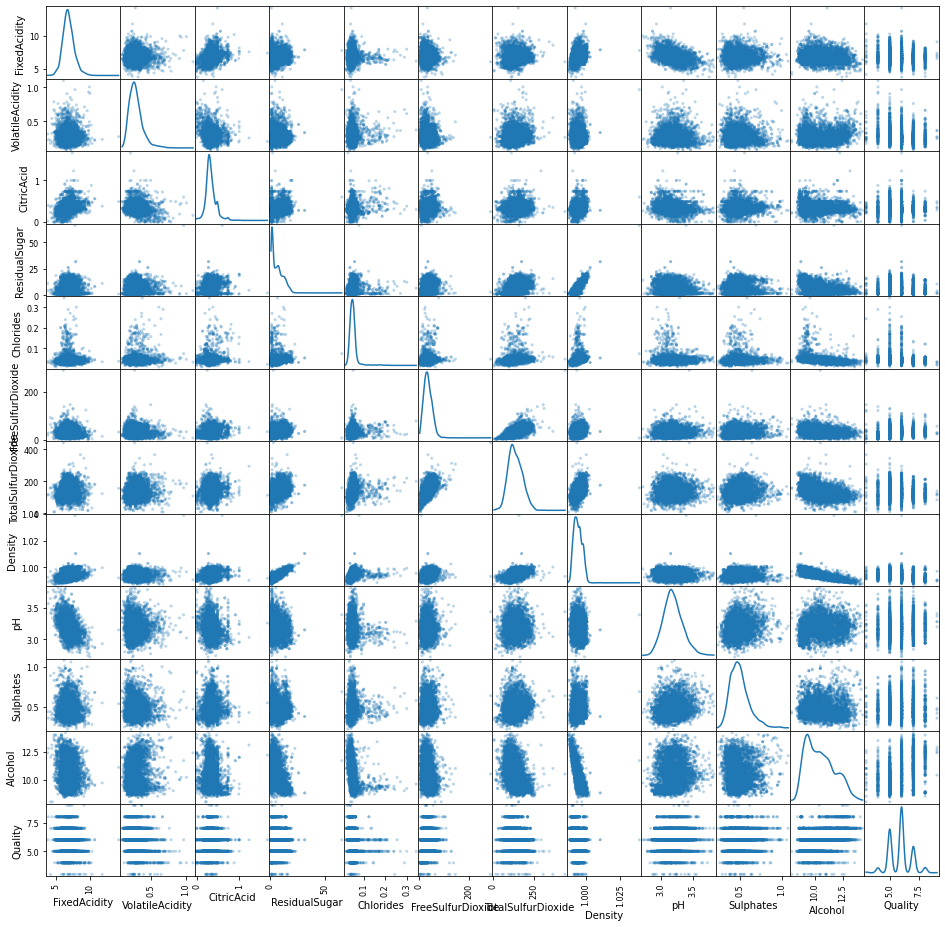

In [7]:
# Dataset quality and outlayer detection.
# Lets view the full corralation matrix, and each input histogram.
# Clearly, there are outlayers we need to clean.

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,16), diagonal = 'kde');

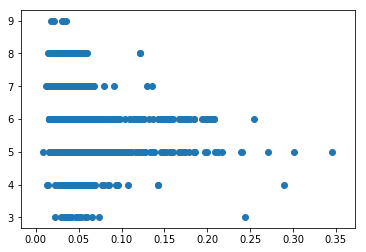

In [7]:
plt.scatter(data.Chlorides,data.Quality)

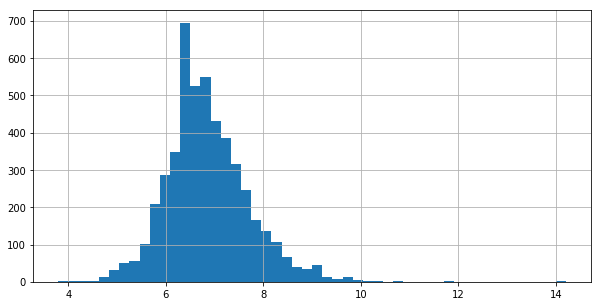

In [8]:
data.FixedAcidity.hist(bins=50, figsize=(10,5));
# outlyer:  FixedAcidity > 10

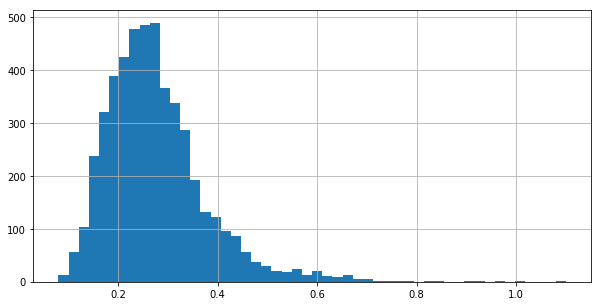

In [9]:
data.VolatileAcidity.hist(bins=50, figsize=(10,5));
# outlyer:  VolatileAcidity > 0.8

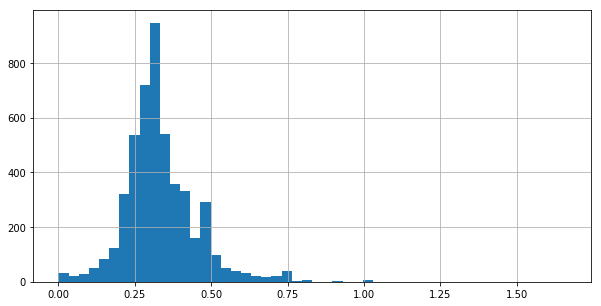

In [10]:
data.CitricAcid.hist(bins=50, figsize=(10,5));
# outlyer:  CitricAcid > 0.76

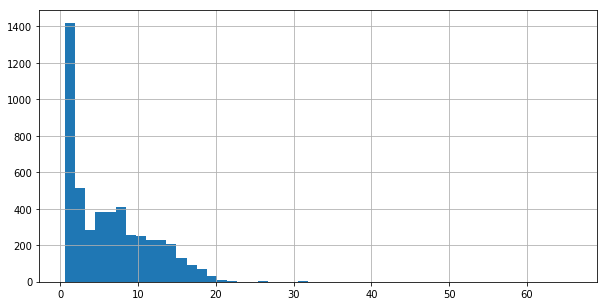

In [11]:
data.ResidualSugar.hist(bins=50, figsize=(10,5));
# outlyer:  ResidualSugar > 22

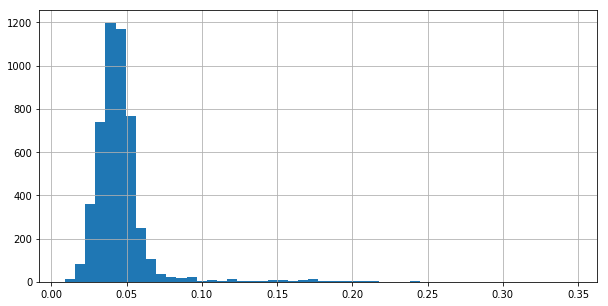

In [12]:
data.Chlorides.hist(bins=50, figsize=(10,5));
# outlyer:  Chlorides > 0.1

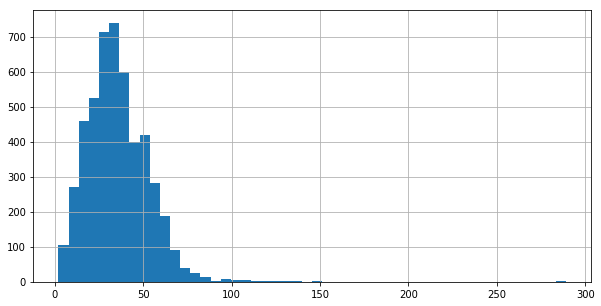

In [13]:
data.FreeSulfurDioxide.hist(bins=50, figsize=(10,5));
# outlyer:  FreeSulfurDioxide > 90

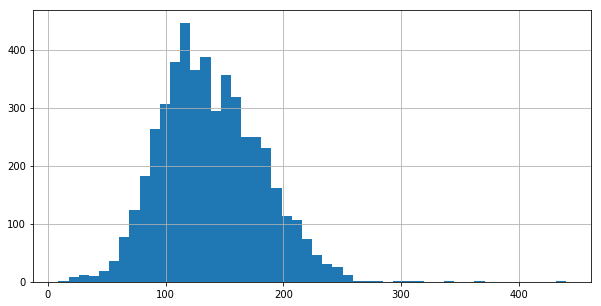

In [14]:
data.TotalSulfurDioxide.hist(bins=50, figsize=(10,5));
# outlyer:  TotalSulfurDioxide > 260

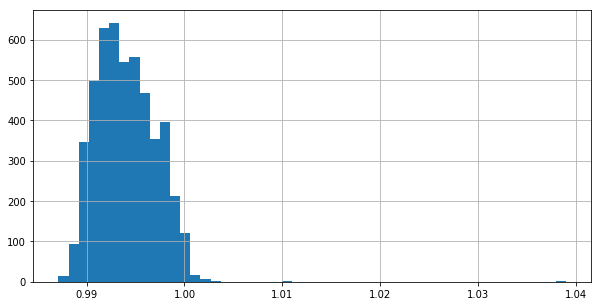

In [15]:
data.Density.hist(bins=50, figsize=(10,5));
# outlyer:  Density > 1.005

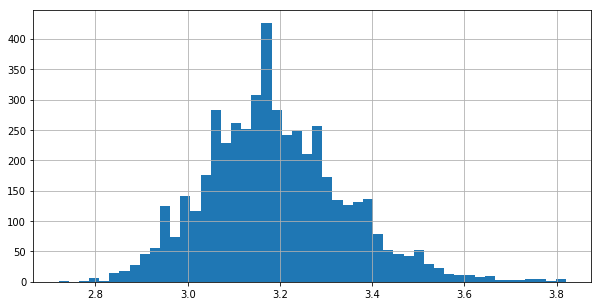

In [16]:
data['pH'].hist(bins=50, figsize=(10,5))
# outlyer:  None

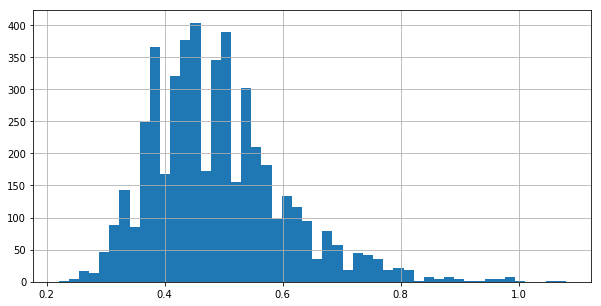

In [17]:
data.Sulphates.hist(bins=50, figsize=(10,5));
# outlyer:  None

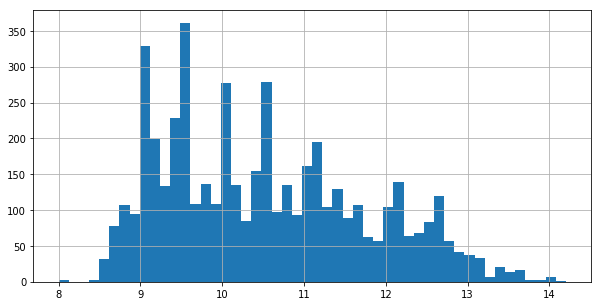

In [18]:
data.Alcohol.hist(bins=50, figsize=(10,5));
# outlyer:  None

In [19]:
# The outliers where clean manualy as distances from the 2D scatter plotting and each variable distances
outliers = data.eval('FixedAcidity > 10 | VolatileAcidity > 0.8 |  CitricAcid > 0.76 | ResidualSugar > 22 | Chlorides > 0.1 | FreeSulfurDioxide > 90 | TotalSulfurDioxide > 260 | Density > 1.005')
print ('Found ', outliers.sum(), ' outliers')

#  We found 174 outliers, which is a small amount relative to the dataset size, and thus can be ignored.

Found  174  outliers


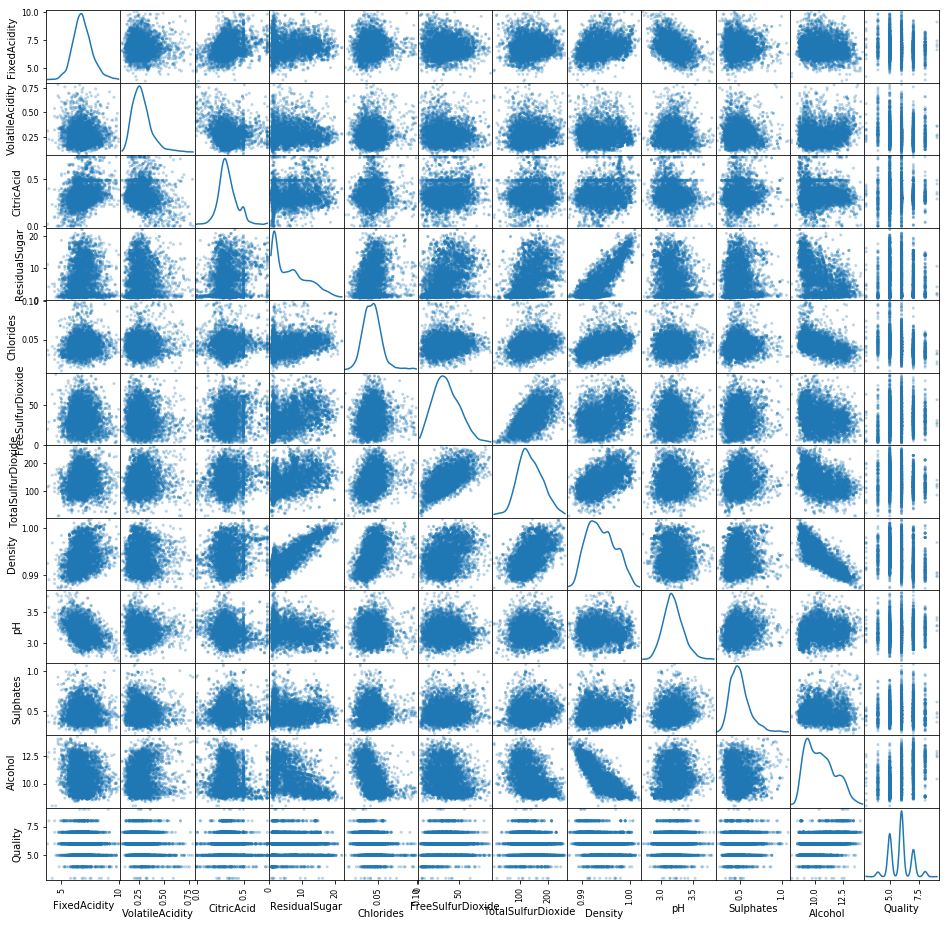

In [20]:
pd.plotting.scatter_matrix(data[~outliers], alpha = 0.3, figsize = (16,16), diagonal = 'kde');

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
FixedAcidity,1.000000,-0.049177,0.301696,0.081999,0.077134,-0.042301,0.083447,0.261624,-0.429360,-0.024616,-0.123561,-0.099969
VolatileAcidity,-0.049177,1.000000,-0.180123,0.043088,0.017276,-0.095484,0.072890,-0.014328,-0.026732,-0.046115,0.080791,-0.173984
CitricAcid,0.301696,-0.180123,1.000000,0.107631,0.033151,0.116899,0.140466,0.160043,-0.154341,0.078409,-0.076005,0.000079
ResidualSugar,0.081999,0.043088,0.107631,1.000000,0.245830,0.350034,0.419495,0.834962,-0.205019,-0.028025,-0.479169,-0.103207
Chlorides,0.077134,0.017276,0.033151,0.245830,1.000000,0.130473,0.340862,0.466070,-0.024616,0.063659,-0.522163,-0.291173
FreeSulfurDioxide,-0.042301,-0.095484,0.116899,0.350034,0.130473,1.000000,0.618056,0.339564,-0.006051,0.065235,-0.263783,0.032446
TotalSulfurDioxide,0.083447,0.072890,0.140466,0.419495,0.340862,0.618056,1.000000,0.552846,0.004287,0.132967,-0.462062,-0.161326
Density,0.261624,-0.014328,0.160043,0.834962,0.466070,0.339564,0.552846,1.000000,-0.091509,0.077251,-0.814966,-0.315132
pH,-0.429360,-0.026732,-0.154341,-0.205019,-0.024616,-0.006051,0.004287,-0.091509,1.000000,0.155487,0.107590,0.090182
Sulphates,-0.024616,-0.046115,0.078409,-0.028025,0.063659,0.065235,0.132967,0.077251,0.155487,1.000000,-0.025913,0.054774


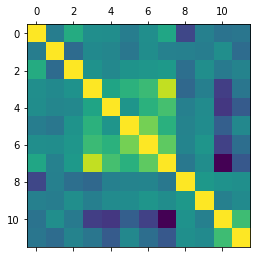

In [21]:
# Check for correlations

plt.matshow(data[~outliers].corr())
data[~outliers].corr()

# There is high correlation between residual sugar and density,
# we are supposed to remove one of them in order to avoid multicolineraity.

# Density was removed in order to slightly improve overfit in the logistoc regression model

In [22]:
# Binning the taget variable / How muce uniques in each range
np.unique(pd.cut(data.values[~outliers,11], [0,5,6,10]), return_counts=True)

(array([Interval(0, 5, closed='right'), Interval(5, 6, closed='right'),
        Interval(6, 10, closed='right')], dtype=object),
 array([1551, 2123, 1050]))

In [23]:
data_X = stats.zscore(data.drop(columns='Density')[~outliers].iloc[:,:10].values)
# The regression tree works better with zscore normalization and without corralated features

le = LabelEncoder()
data_Y = pd.DataFrame(le.fit_transform(pd.cut(data.values[~outliers,11], [0,5,6,10])), columns=['Quality']).values
N = data_X.shape[0]   # Total number of good samples
split = 0.8

train_X = data_X[:int(N * split)]
train_Y = data_Y[:int(N * split)]
test_X = data_X[int(N * split):]
test_Y = data_Y[int(N * split):]

train_X.shape, train_Y.shape, test_X.shape,test_Y.shape

((3779, 10), (3779, 1), (945, 10), (945, 1))

In [24]:
# Logistic Regression with builtin Cross Validation 

clf_logistic_regression = LogisticRegressionCV(cv=20, max_iter=100, multi_class='multinomial', penalty='l2',
                                               random_state=0, n_jobs=-1 ).fit(train_X, train_Y.reshape(-1,))

train_results_logistic_regression = clf_logistic_regression.predict(train_X)
test_results_logistic_regression = clf_logistic_regression.predict(test_X)

In [25]:
# Classifier parameters 
clf_logistic_regression.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegressionCV(Cs=10, class_weight=None, cv=20, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=-1, penalty='l2',
           random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)>

In [26]:
data_X = data[~outliers].iloc[:,:11]

le = LabelEncoder()
data_Y = pd.DataFrame(le.fit_transform(pd.cut(data.values[~outliers,11], [0,5,6,10])), columns=['Quality'])

N = data_X.shape[0]   # Total number of good samples
split = 0.8

train_X = data_X[:int(N * split)]
train_Y = data_Y[:int(N * split)]
test_X = data_X[int(N * split):]
test_Y = data_Y[int(N * split):]

train_X.shape, train_Y.shape, test_X.shape,test_Y.shape

((3779, 11), (3779, 1), (945, 11), (945, 1))

In [27]:
# Tree classifier ( ID3 )

clf_decision_tree = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')
clf_decision_tree.fit(train_X,train_Y)


train_results_decision_tree = clf_decision_tree.predict(train_X)
test_results_decision_tree = clf_decision_tree.predict(test_X)

In [28]:
clf_decision_tree.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

# Question 1E.


A. The data and outliers where clean manualy as distances viewed (and retested on the model to best preform) ,  from the 2D scatter plotting and the data histograms.
B. Quality was binned into 3 levels poor( 0-4, 1551 rows), medium(5, 2123 rows) , good(6-10, 1050 rows). smaller ranges on quality resulted heavily unbalance and poor results.

C. The logistic regression model preformed better with zscore normalization, and remuval of 'Density' feature ( due to multicolineraity ).
   The tree classifier woked better on the clean data without zscore and with 'Density'.
   
# Question 2A
The model selected where logistic regression and tree classifier ( C4.5 ), both handle by their desigh continuoes features and nominal data as target.

in the logistic regression we used cross validation (cv=20) iin order to improve preformence and aviod overfitting.

the models input paramters selected are in the cell above ( clf_.decision_path cells)



In [29]:
# Logistic Regrassion Model Coefficient of the features and Intercept
coefficients = pd.DataFrame(clf_logistic_regression.coef_, columns=[u'FixedAcidity', u'VolatileAcidity', u'CitricAcid',
       u'ResidualSugar', u'Chlorides', u'FreeSulfurDioxide',
       u'TotalSulfurDioxide', u'pH', u'Sulphates', u'Alcohol'])
coefficients['Inetrcept'] = clf_logistic_regression.intercept_

coefficients

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,Inetrcept
0,0.041639,0.408855,0.045357,-0.207076,0.121906,-0.186150,0.039350,-0.095242,-0.155227,-0.894074,-0.036415
1,-0.005487,-0.154462,0.004566,0.009889,0.036086,0.007193,0.062653,-0.034356,0.009807,0.038816,0.496122
2,-0.036152,-0.254394,-0.049924,0.197187,-0.157992,0.178957,-0.102003,0.129598,0.145420,0.855258,-0.459707


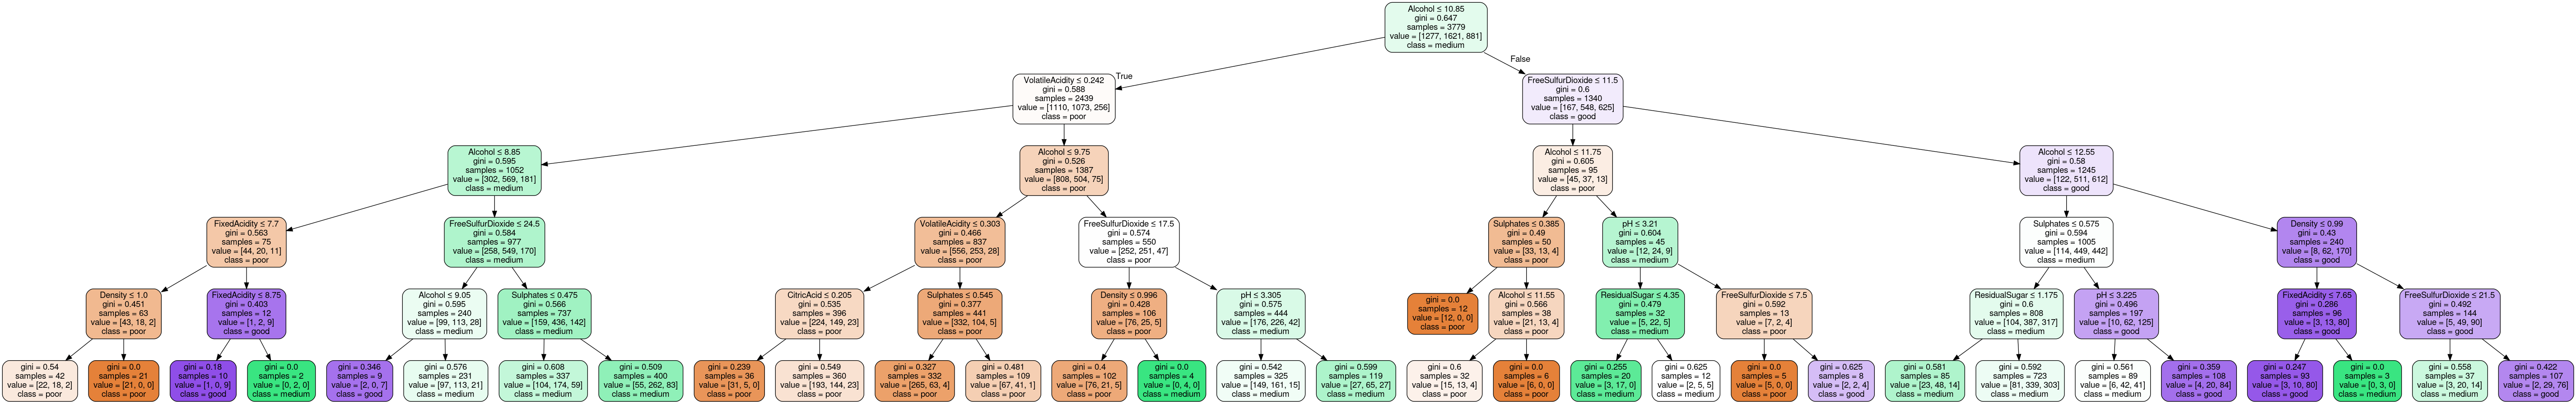

In [30]:
# Decision Tree Results

tree.export_graphviz(clf_decision_tree, out_file='tree.dot')
dot_data = StringIO()
tree.export_graphviz(clf_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=data_X.columns, class_names=['poor', 'medium', 'good'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [31]:
#Logistic Regrassion results
print('Train Accuracy classification score:', accuracy_score(train_Y,train_results_logistic_regression))
print('Test Accuracy classification score:', accuracy_score(test_Y,test_results_logistic_regression))

Train Accuracy classification score: 0.5715797830113787
Test Accuracy classification score: 0.5746031746031746


In [32]:
confusion_matrix(train_Y, train_results_logistic_regression) # Train

array([[ 745,  500,   32],
       [ 368, 1036,  217],
       [  49,  453,  379]])

In [33]:
confusion_matrix(test_Y, test_results_logistic_regression) # Test

array([[152, 113,   9],
       [ 72, 316, 114],
       [ 22,  72,  75]])

In [34]:
# Most common calculation
(train_Y==1).sum(), (test_Y==1).sum()

(Quality    1621
 dtype: int64, Quality    502
 dtype: int64)

In [35]:
# Logsitic regression most common
1036./1621. , 316./502.

(0.6391116594694632, 0.6294820717131474)

In [36]:
# Decision tree results
print('Train Accuracy classification score:', accuracy_score(train_Y,train_results_decision_tree))
print('Test Accuracy classification score:', accuracy_score(test_Y,test_results_decision_tree))

Train Accuracy classification score: 0.5895739613654406
Test Accuracy classification score: 0.5925925925925926


In [37]:
confusion_matrix(test_Y, test_results_decision_tree) # Test

array([[125, 143,   6],
       [ 57, 384,  61],
       [ 21,  97,  51]])

In [38]:
confusion_matrix(train_Y, train_results_decision_tree) # Train

array([[ 713,  550,   14],
       [ 305, 1255,   61],
       [  39,  582,  260]])

model accuracy ( on test set)

In [39]:
# Decision tree most common
1255./1621. , 384./502.

(0.7742134484885873, 0.7649402390438247)

# Question 2E
# Comparison
we tested the accurcy of the model on two diffrent metrics methods:
a. accuracy score.
b. most common test, which test the precision on the value that accures the most.

On both tests the Decision tree preformed better, both on Training set, and on the Test set.
accuracy - (0.58,0.59) VS (0.57,0.57) .
most common - (0.77,0.76) VS (0.63,0.62) .

we can also see that both models preform better then a "random model".

Further suggestions and improvement:
* We can ensamble a method that combines the two models, which could find better buonderies of each set.
* We can try to bin some of the features to impruve the decision tree.
* We can try diffrent scealing then zscore that might produce cbetter results.

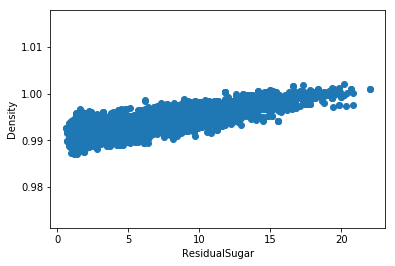

In [42]:
plt.scatter(data[~outliers].ResidualSugar.values, data[~outliers].Density.values)
plt.xlabel('ResidualSugar')
plt.ylabel('Density')
plt.show()

Text(0.5, 0, 'pH')

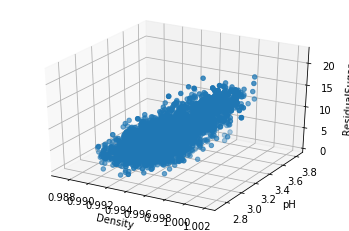

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[~outliers].Density.values, data[~outliers].pH.values, data[~outliers].ResidualSugar.values)
ax.set_zlabel('ResidualSugar')
ax.set_xlabel('Density')
ax.set_ylabel('pH')
